In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_full = pd.read_csv('../reports/result_df.csv')
df_full['name'] = df_full.T.apply(lambda row: '_'.join([str(x) for x in row.drop(['num', 'smape', 'mase*'])]))
print(df_full.shape)
df = df_full[df_full['num'].isna()].dropna(axis=1)
df = df[df['loss'] != 'mse']
print(df.shape)

(4285, 12)
(200, 11)


In [3]:
def add_benchmarks(legend_loc=None):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    plt.plot([-0.5, 250.5], [13.176, 13.176], ls='--', c='C3', label='M4 winner', lw=2)
    plt.plot([-0.5, 250.5], [12.913, 12.913], ls='--', c='C4', label='N-BEATS', lw=2)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.legend(loc=legend_loc)
    
def keep_duplicates(df, column):
    
    gb = df.groupby(column)

    for group in gb.groups:
        try:
            mask.merge(gb.get_group(group).drop([column, 'smape', 'mase*'], axis=1), how='inner')
        except NameError:
            mask = gb.get_group(group).drop([column, 'smape', 'mase*'], axis=1)
            
    results = [gb.get_group(group).merge(mask) for group in gb.groups]
    
    return pd.concat(results)

## Comparison of all models

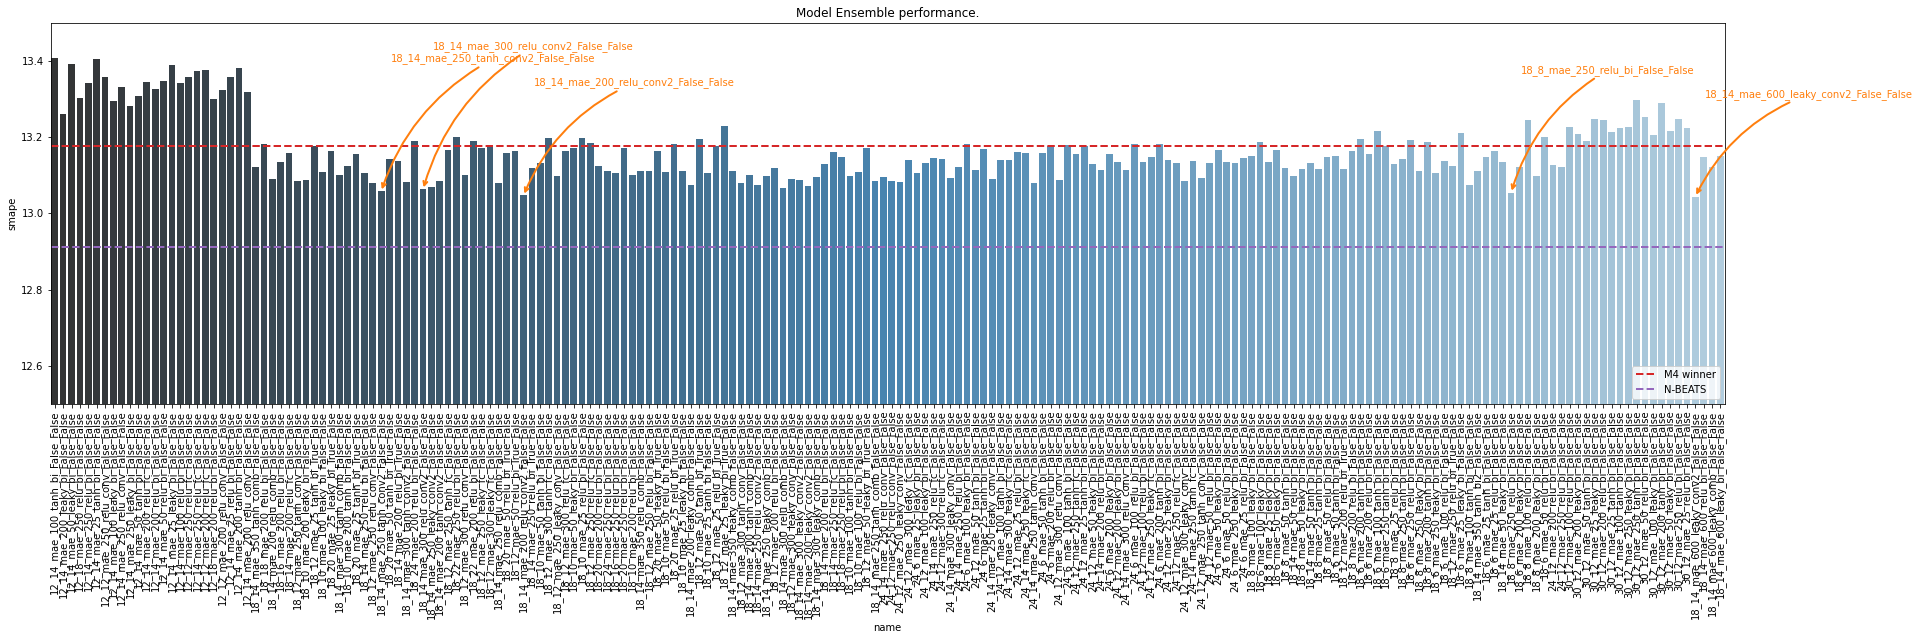

In [4]:
plt.figure(figsize=(30, 7))

top5 = df.reset_index().sort_values('smape')[:5].index

ax = sns.barplot(x='name', y='smape', data=df, palette='Blues_d')

# [bar.set_color('C1') for bar in np.array(ax.get_children())[top5]]
# [label.set_color('C1') for label in np.array(ax.get_xticklabels())[top5]]

for en, i in enumerate(top5):
    ax.annotate(df.iloc[i]['name'], (i, df.iloc[i]['smape']), 
                (10, 100+(en*10)), textcoords='offset points', c='C1',
                arrowprops={'arrowstyle': '->', 'color': 'C1',
                            'connectionstyle': 'arc3,rad=.2', 'lw': 2})

plt.title('Model Ensemble performance.')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks(legend_loc='lower right')

## Input size

In [5]:
df2 = df[df.drop(['name', 'input_len', 'smape', 'mase*'], axis=1).duplicated(keep=False)].drop('name', axis=1)
df2 = keep_duplicates(df2, 'input_len')

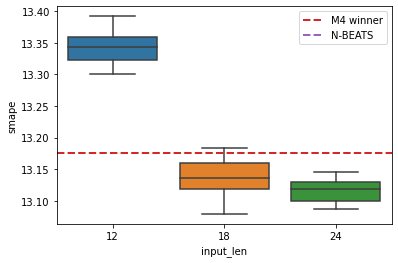

In [6]:
sns.boxplot(x='input_len', y='smape', data=df2)
add_benchmarks()

## Output size

In [7]:
df3 = keep_duplicates(df.drop('name', axis=1), 'output_len')

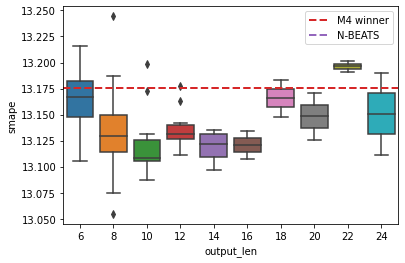

In [8]:
sns.boxplot(x='output_len', y='smape', data=df3)
add_benchmarks()

## Bottleneck

In [33]:
df4 = keep_duplicates(df.drop('name', axis=1), 'bottleneck_size')

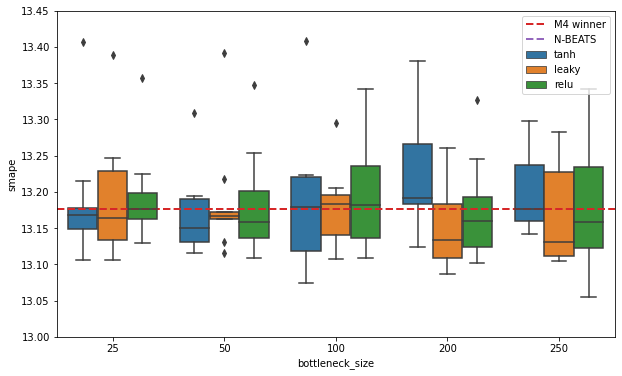

In [34]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='bottleneck_size', y='smape', data=df4, hue='bottleneck_activation')
plt.ylim([13, 13.45])
add_benchmarks()

## Model type

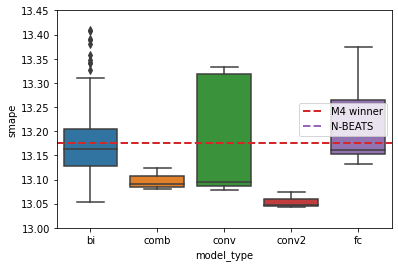

In [11]:
df5 = keep_duplicates(df.drop('name', axis=1), 'model_type')

sns.boxplot(x='model_type', y='smape', data=df5)
plt.ylim([13, 13.45])
add_benchmarks()

### 5 best models (according to SMAPE)

In [13]:
df.sort_values('smape').head(5)

,input_len,output_len,loss,bottleneck_size,bottleneck_activation,model_type,line,aug,smape,mase*,name
4195,18,14,mae,600,leaky,conv2,False,False,13.044111,2.670410,18_14_mae_600_leaky_conv2_False_False
1466,18,14,mae,200,relu,conv2,False,False,13.047135,2.671492,18_14_mae_200_relu_conv2_False_False
3893,18,8,mae,250,relu,bi,False,False,13.054597,2.663258,18_8_mae_250_relu_bi_False_False
939,18,14,mae,250,tanh,conv2,False,False,13.057926,2.665477,18_14_mae_250_tanh_conv2_False_False
1094,18,14,mae,300,relu,conv2,False,False,13.063236,2.676662,18_14_mae_300_relu_conv2_False_False


## Line models

In [16]:
df6 = keep_duplicates(df.drop('name', axis=1), 'line')

In [17]:
df6

,input_len,output_len,loss,bottleneck_size,bottleneck_activation,model_type,line,aug,smape,mase*
0,12,14,mae,100,tanh,bi,False,False,13.408574,2.530077
1,12,14,mae,200,leaky,bi,False,False,13.261222,2.494438
2,12,14,mae,50,leaky,bi,False,False,13.391856,2.523162
3,12,18,mae,250,relu,bi,False,False,13.303312,2.514293
4,12,14,mae,250,relu,bi,False,False,13.341430,2.522677
...,...,...,...,...,...,...,...,...,...,...
183,18,14,mae,600,leaky,bi,False,False,13.150090,2.706002
0,18,14,mae,200,relu,bi,True,False,13.136560,2.697069
1,18,14,mae,250,relu,bi,True,False,13.118774,2.689692
2,18,12,mae,200,relu,bi,True,False,13.115625,2.692536


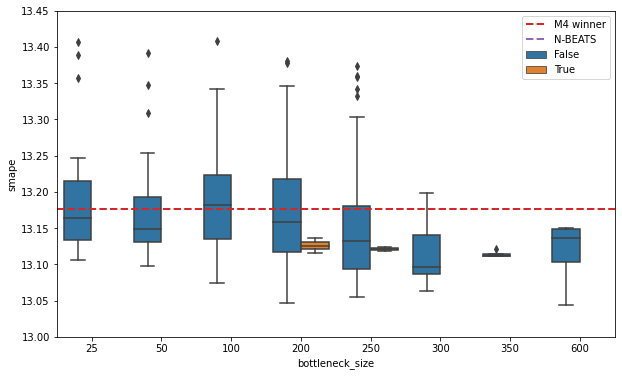

In [18]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='bottleneck_size', y='smape', hue='line', data=df6)
plt.ylim([13, 13.45])
add_benchmarks()

## 30+ model ensembles

In [38]:
df7 = df.merge(df_full[df_full['num'] == 29].drop(['num', 'smape', 'mase*'], axis=1), on='name')

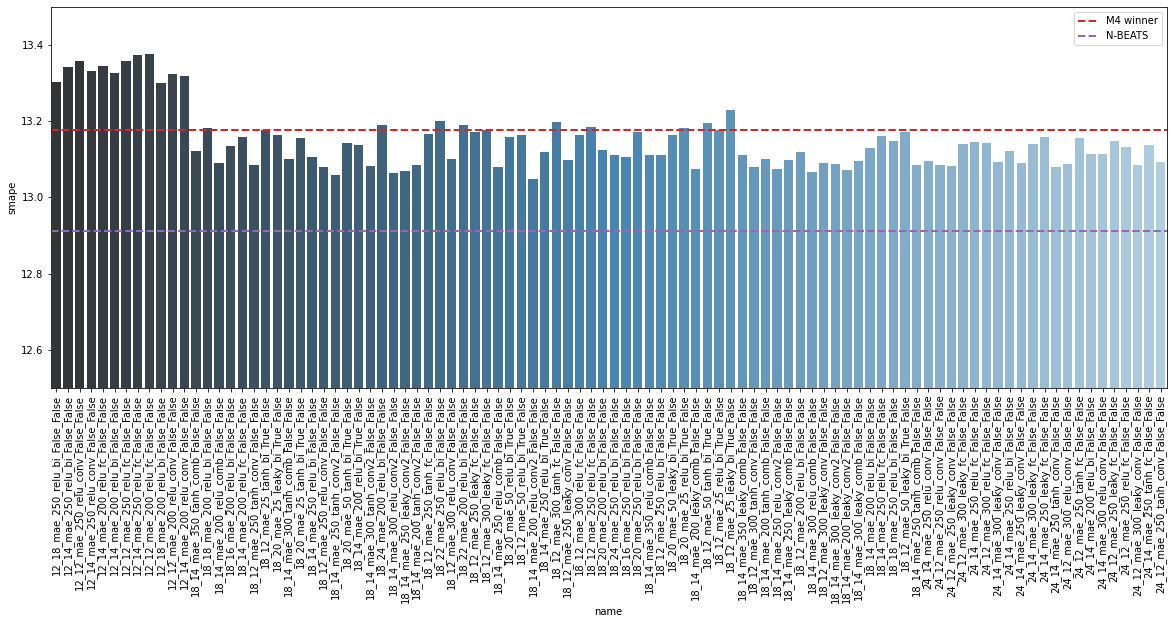

In [39]:
plt.figure(figsize=(20, 7))
sns.barplot(x='name', y='smape', data=df7, palette='Blues_d')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()

## New

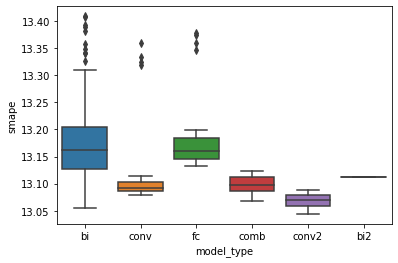

In [32]:

sns.boxplot(x='model_type', y='smape', data=df)

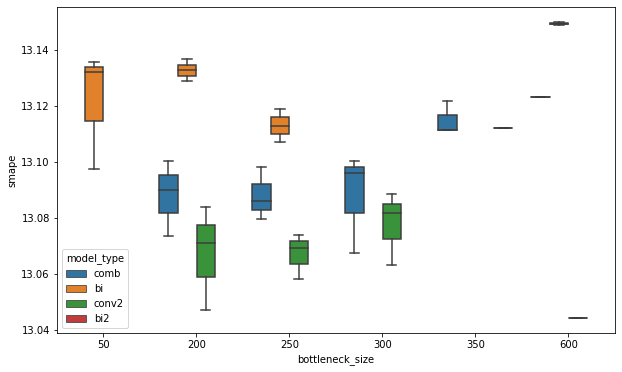

In [43]:
plt.figure(figsize=(10, 6))

df8 = df[(df['input_len'] == 18) & (df['output_len'] == 14) & (df['model_type'] != 'fc')]

sns.boxplot(x='bottleneck_size', y='smape', hue='model_type', data=df8)